Reading data using pandas

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')

check the data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.shape

(5572, 5)

Text has got commas that brought us few more unnamed columns. we need to deal with this.
perform column merging 

In [5]:
#removing nan and performing merging
for r in range(0,df.shape[0]):
    for i in range(2,5):
        if(str(df.iloc[r,i])=="nan"):
            break
        df.iloc[r,1]+=str(df.iloc[r,i])
    df.iloc[r,1]=df.iloc[r,1].lower()



In [6]:
df=df.drop(df.iloc[:, 2:5],axis = 1)

In [7]:
df.shape

(5572, 2)

preprocessing the text

we have already converted into lower case 

removing numbers,
removing punctuation,
removing white spaces,
removing hyperlink,
removing stop words,
Word Stemming,
Word lemmatization,


use nltk library for natural language processing

In [8]:
from nltk.stem import WordNetLemmatizer
#as Lemmatization has higher accuracy than stemming, we prefer lemmatization.

In [9]:
from wordcloud import STOPWORDS, WordCloud

In [10]:
#removing punctuations and numericals
for i in range(df.shape[0]):
    txt=df.iloc[i,1]
    s=""
    for word in txt:
        word.strip("1234567890!@#$%^&*()_+-=:;/<>,.?'/ ")
        s=word+" "
    txt=" ".join(s)
    

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
spam=""
ham=""
for i in range(df.shape[0]):
    #removing stop words 
    lemma_words = [lemmatizer.lemmatize(o) for o in df.iloc[i,1]]
    df.iloc[i,1]="".join(lemma_words)
    #print(i,df.iloc[i,1])
    if(df.iloc[i,0]=="spam"):
        spam=spam+" "+df.iloc[i,1]
    else:
        ham=ham+" "+df.iloc[i,1]
#print(spam,ham)
        

In [13]:
df.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [14]:
#lets see wordcloud of spam and ham mails

In [15]:
import matplotlib.pyplot as plt

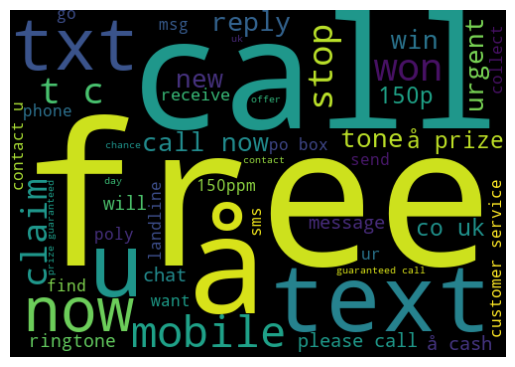

In [16]:
wordcloud = WordCloud(
        stopwords=STOPWORDS, max_words=50, width=500, height=350
    ).generate(spam)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

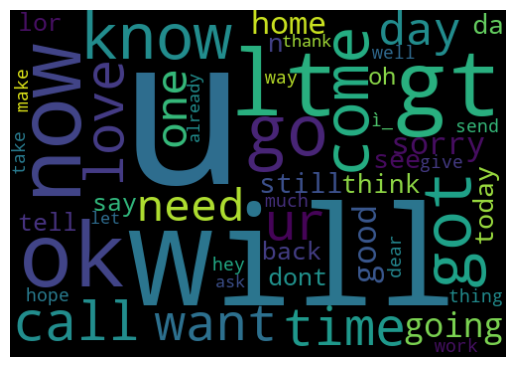

In [17]:
wordcloud = WordCloud(
        stopwords=STOPWORDS, max_words=50, width=500, height=350
    ).generate(ham)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Feature extraction

In [18]:
#CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [20]:
cntVect = CountVectorizer(decode_error='ignore')
x = cntVect.fit_transform(df['v2'])
x_train, x_test, y_train, y_test = train_test_split(x, df['v1'], test_size=0.3, random_state=20)


importing naivebayes classifier model

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb=GaussianNB()

In [23]:
#training the model
nb.fit(x_train.toarray(),y_train)


GaussianNB()

In [24]:
#check for accuracy
#on training set
print(nb.score(x_train.toarray(),y_train))
#on test set
print(nb.score(x_test.toarray(),y_test))

0.9551282051282052
0.9210526315789473
